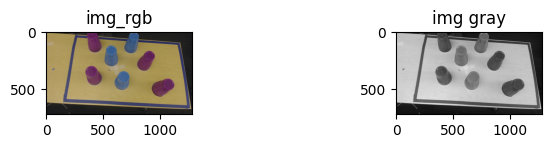

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# import imutils
# file = 'circles.png'
file = 'frame0000.jpg'    
img_bgr = cv.imread(file)
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
img_gray = cv.imread(file, cv.IMREAD_GRAYSCALE)
assert img_rgb is not None, "file could not be read, check with os.path.exists()"

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('img_rgb')

plt.subplot(1, 3, 3)
plt.imshow(img_gray, cmap='gray')
plt.title('img gray')

img = img_bgr

In [5]:
cv.imshow('cimg',img)
cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
img_blur = cv.GaussianBlur(img, (15,15), 0) 

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
img_hsv = cv.cvtColor(img_blur, cv.COLOR_BGR2HSV)

lower_hsv = np.array([120, 150, 100])
upper_hsv = np.array([180, 255, 255])
mask = cv.inRange(img_hsv, lower_hsv, upper_hsv)

In [11]:
cimg = img_bgr.copy()
cont, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
for c in cont:
    m = cv.moments(c)
    if m["m00"] != 0:
        c_x = int(m["m10"] / m["m00"])
        c_y = int(m["m01"] / m["m00"])
        cv.circle(cimg, (c_x, c_y), 5, (255, 0, 0), -1)

Text(0.5, 1.0, 'centers')

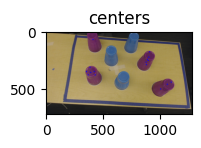

In [12]:
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(cimg, cv.COLOR_BGR2RGB))
plt.title('centers')

In [4]:
cv.imshow('hsv contours', cimg)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:

# img = cv.medianBlur(img,5)
# rows = img.shape[0]
# cimg = cv.cvtColor(img,cv.COLOR_RGB2BGRA)
# plt.imshow(img)
# img = img_gray
# # circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
# #                             param1=50,param2=30,minRadius=0,maxRadius=0)
# circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,rows/8,
#                             param1=100,param2=30,minRadius=10,maxRadius=50)

# circles = np.uint16(np.around(circles))
# for i in circles[0,:]:
#     # draw the outer circle
#     cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
#     # draw the center of the circle
#     cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
# cv.imshow('detected circles',cimg)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [ ]:
# for i, center in enumerate(circles[0, :]):
#     print(f"Center {i + 1}: ({center[0]}, {center[1]})\n")

In [2]:
# given image, get edges.
# use opencv - edge detection
# Blur the image for better edge detection
median = cv.medianBlur(img_gray,5)
img_blur = cv.GaussianBlur(median, (5,5), 0) 

edges = cv.Canny(image=img_blur, threshold1=100, threshold2=200) 
 
cv.imshow('Canny Edge Detection', edges)
cv.waitKey(0)

-1

In [ ]:
# rectangle = cv.imread("./rectangle.jpg", cv.IMREAD_GRAYSCALE)
rectangle = edges
# find corners of image
corners = cv.cornerHarris(rectangle, blockSize=15, ksize=5, k=0.15)

threshold = 0.25 * corners.max()
corner_coordinates = np.column_stack(np.where(corners > threshold))
# print(corner_coordinates)
for coord in corner_coordinates:
    cv.circle(rectangle, (coord[1], coord[0]), 15, 100, -1)
print(corners.max())
rectangle[corners > threshold] = [0]
cv.imshow('Corner Detection', rectangle)
cv.waitKey(0)
cv.destroyAllWindows()


# get corners in sawyer coordinates (through ar tags or hardcoding)
# use bounding box on edges

0.16814432


In [ ]:
rectim = edges

# x,y,w,h = cv.boundingRect(corner_coordinates)
# b_rec = cv.rectangle(rectim,(x,y),(x+w,y+h),(0,255,0),2)
# cv.imshow('Bounded Box', b_rec)
# cv.waitKey(0)
# cv.destroyAllWindows()

rect = cv.minAreaRect(corner_coordinates)
box = cv.boxPoints(rect)
box = np.int0(box)
print(box)

# cv.drawContours(rectim, [box], 0, (255,255,255), 2)
# cv.imshow('Bounding Box', rectim)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [ ]:
max_dist = 0
max_pts = [None, None]

for i in range(len(box)):
    for j in rangeboundingRect(0, i):
        dist = np.sqrt((box[i][0] - box[j][0])**2 + (box[i][1] - box[j][1])**2)
        if dist > max_dist:
            max_dist = dist
            max_pts = [box[i],box[j]]
color=255
thickness=2
# print(max_pts)

img = np.zeros(rectim.shape, np.uint8)
cv.rectangle(rectim, tuple(max_pts[0]), tuple(max_pts[1]), (255,255,255), 3)
cv.imshow('title', rectim)
cv.waitKey(0)
cv.destroyAllWindows()


In [7]:
cnts = cv.findContours(edges.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
cnts2 = imutils.grab_contours(cnts)
c = max(cnts2, key = cv.contourArea)
r = cv.minAreaRect(c)

box = cv.boxPoints(r)
box = np.int0(box)
print(box)

temp = edges.copy()
cv.drawContours(temp, [box], 0, (255,0,0), 2)
cv.imshow('Bounding Box', temp)
cv.waitKey(0)
cv.destroyAllWindows()

[[1234  645]
 [ 179  590]
 [ 207   51]
 [1263  107]]


In [13]:
temp2 = edges.copy()
# cv.drawContours(temp2, cnts2, -1, (255,0,0), 3)
cv.drawContours(temp2, [c], 0, (255,0,0), 3)
cv.imshow('contours', temp2)
cv.waitKey(0)
cv.destroyAllWindows()